In [1]:
import pandas as pd
import quandl,math,datetime
import pickle
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
df=quandl.get('BSE/BOM533171')

In [3]:
df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2010-03-18,77.0,77.00,68.10,68.80,71.381343,28299084.0,82679.0,2.020027e+09,5279146.0,18.65,8.90,-8.20
2010-03-19,69.7,70.60,68.40,69.10,69.544990,4135689.0,15920.0,2.876165e+08,1378581.0,33.33,2.20,-0.60
2010-03-22,68.0,68.05,66.10,66.65,67.307760,1097433.0,4629.0,7.386576e+07,563231.0,51.32,1.95,-1.35
2010-03-23,67.5,69.25,66.75,68.55,67.894429,1493862.0,4856.0,1.014249e+08,780051.0,52.22,2.50,1.05
2010-03-25,68.3,69.00,67.55,68.25,68.310011,636580.0,2572.0,4.348479e+07,316290.0,49.69,1.45,-0.05


In [4]:
df.tail()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2020-03-16,4.81,4.88,4.55,4.66,4.70,95396.0,199.0,448478.0,71454.0,74.90,0.33,-0.15
2020-03-17,4.65,4.86,4.61,4.64,4.70,101580.0,216.0,477066.0,59949.0,59.02,0.25,-0.01
2020-03-18,4.74,4.75,4.39,4.43,4.52,70379.0,181.0,317957.0,41391.0,58.81,0.36,-0.31
2020-03-19,4.55,4.67,4.15,4.50,4.43,65020.0,157.0,287846.0,52240.0,80.34,0.52,-0.05
2020-03-20,4.50,4.70,4.45,4.48,4.54,36365.0,138.0,164933.0,23399.0,64.34,0.25,-0.02


In [5]:
df.shape

(2484, 12)

In [6]:
duplicated_values=df[df.duplicated()] #checks if there are duplicate rows
duplicated_values
#no duplicate values

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,


In [7]:
df.info()
#the quality of data is good

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2010-03-18 to 2020-03-20
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       2484 non-null   float64
 1   High                       2484 non-null   float64
 2   Low                        2484 non-null   float64
 3   Close                      2484 non-null   float64
 4   WAP                        2484 non-null   float64
 5   No. of Shares              2484 non-null   float64
 6   No. of Trades              2484 non-null   float64
 7   Total Turnover             2484 non-null   float64
 8   Deliverable Quantity       2483 non-null   float64
 9   % Deli. Qty to Traded Qty  2483 non-null   float64
 10  Spread H-L                 2484 non-null   float64
 11  Spread C-O                 2484 non-null   float64
dtypes: float64(12)
memory usage: 252.3 KB


In [8]:
df=df[["Open","High","Low","Close","No. of Trades"]] #choosing the columns required for regression

In [9]:
df["HL"]=df["High"]-df["Close"]/df["Close"]*100 # High-low price percentage

In [10]:
df["PCT"]=df["Close"]-df["Open"]/df["Open"]*100 # Daily percentage change 

In [11]:
df=df[["Close","HL","PCT","No. of Trades"]] 

In [12]:
df.head()

,Close,HL,PCT,No. of Trades
Date,,,,
2010-03-18,68.80,-23.00,-31.20,82679.0
2010-03-19,69.10,-29.40,-30.90,15920.0
2010-03-22,66.65,-31.95,-33.35,4629.0
2010-03-23,68.55,-30.75,-31.45,4856.0
2010-03-25,68.25,-31.00,-31.75,2572.0


In [13]:
forecast_col="Close" 

In [14]:
df.fillna(-99999,inplace=True) #filling the empty rows, a large value like -9999 would act like outliers, ML cannot have NaN entries

In [15]:
forecast_out=int(math.ceil(0.1*len(df))) #predict 10% closing price or predict next day's stock price

In [16]:
df["label"]=df[forecast_col].shift(-forecast_out) #label column I want to have predicted values in

In [17]:
df.tail()

,Close,HL,PCT,No. of Trades,label
Date,,,,,
2020-03-16,4.66,-95.12,-95.34,199.0,NaN
2020-03-17,4.64,-95.14,-95.36,216.0,NaN
2020-03-18,4.43,-95.25,-95.57,181.0,NaN
2020-03-19,4.50,-95.33,-95.50,157.0,NaN
2020-03-20,4.48,-95.30,-95.52,138.0,NaN


In [18]:
#train and test
import numpy as np
from sklearn import preprocessing, model_selection,svm 
from sklearn.linear_model import LinearRegression

In [19]:
X=np.array(df.drop(['label'],1)) #feature is everything but label, data reuired to predict label
X=preprocessing.scale(X) #time-consuming, avoid in high-frequency trading

X=X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y=np.array(df['label']) #label column
print(len(X),len(y))



2235 2235


/tmp/ipykernel_5765/2512237755.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['label'],1)) #feature is everything but label, data reuired to predict label


In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)#20% data to test
clf=LinearRegression()


#clf=LinearRegression(n_jobs=-1)   #parallel processing with as many cores available 
#clf=svm.SVR()                    #Alternate algorithm, change kernel for higher accuracy

In [21]:
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

#with open ('linearregression.pickle','wb') as f:
#    pickle.dump(clf,f)

#pickle_in=open('linearregression.pickle','rb')
#clf = pickle.load(pickle_in)

0.6863235247322876


In [29]:
forecast_set=clf.predict(X_lately) 


In [30]:
print(forecast_set, accuracy, forecast_out)

[13.40788279 14.60126719 16.13684729 14.72975566 14.15378768 13.80515582
 13.89898979 13.63590563 13.68853849 13.45046024 13.59470219 14.04571547
 14.11076972 14.24384828 14.05234963 14.24421331 14.16906364 14.04305457
 13.9824237  13.87897915 13.8754278  13.7642953  13.69157888 13.65231905
 13.59825972 13.79959605 13.75919564 13.53470238 13.55407951 13.6802097
 13.57355448 13.42508311 13.42190297 13.45692336 13.43716106 13.41197299
 13.33519929 13.2812249  13.16953071 13.09632904 12.65756649 12.41087081
 12.46699352 12.48642399 12.40885711 12.38060509 12.55676589 12.46271871
 12.5497382  12.90862022 13.10399031 12.94005676 12.90061209 12.6800824
 12.40845304 12.37243189 12.56785739 12.62367898 13.06190285 13.07381554
 13.02616697 12.94902734 12.93653647 12.81939503 12.74456207 12.74737503
 12.69006869 12.52745152 12.55639816 12.44441466 12.40125939 12.17187675
 12.07827723 12.23944598 12.5486012  12.2974173  12.50976092 12.30161898
 12.35414146 12.74386397 12.72135485 12.54076233 12.5

In [24]:
df['Forecast']=np.nan 

In [25]:
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

In [26]:

for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix) 
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] +[i]

Text(0, 0.5, 'Price')

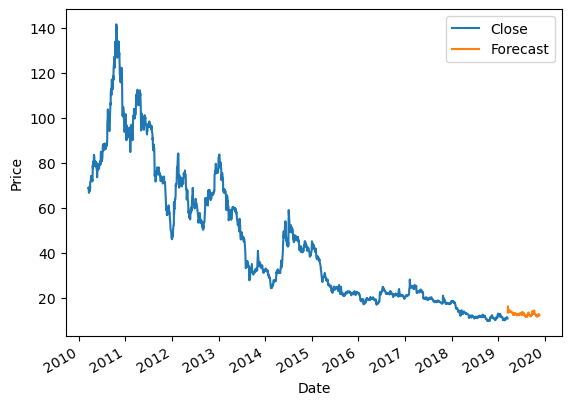

In [32]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('Date')
plt.ylabel('Price')